In [3]:
import numpy as np
import os
import sys
import matplotlib
#matplotlib.use('TKAgg')
from matplotlib import pyplot as plt
#import pymc as pm
from PIL import Image
import os
import glob 
import matplotlib.animation as animation 
import pandas as pd
from numpy import genfromtxt
import math
import homography as h


sys.path.insert(0,'/usr/local/lib/python2.7/site-packages/')
import cv2
print cv2.__version__
scale = 1
delta = 0
ddepth = cv2.CV_16S
# needed for orb because of a bug
cv2.ocl.setUseOpenCL(False)

3.1.0


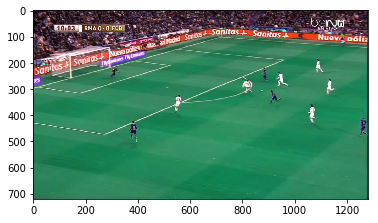

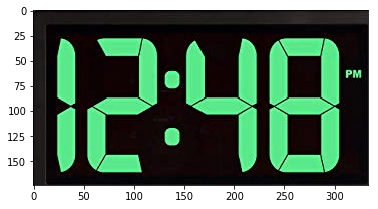

In [10]:
%matplotlib inline

# load original images
fileName = "BarcaReal001.jpg"
imageFile = 'images/barcaReal/'+fileName
clockFile = 'images/logos/Clock.png' #penn_engineering_logo.png'
img = cv2.imread(imageFile)
imgClock = cv2.imread(clockFile)

plt.imshow(img)
plt.figure()
plt.imshow(imgClock)

[141.536  175.326  293.248  142.6483 295.4956 219.9856 144.9074 261.3775]
numb interior  12413  out of  921600


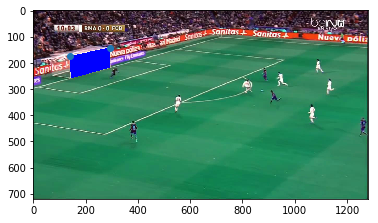

<Figure size 432x288 with 0 Axes>

In [11]:
# Get coordinates of 4 corners of goal

kpMat =  genfromtxt('data/Barcav2.csv', delimiter=',')
kp1 = kpMat[0,:]
print kp1


kp = []
for i in range(4):
    xi = 2*i
    yi = 2*i + 1
    xI = kp1[xi] # 720 - kp1[xi] 
    yI = kp1[yi]
    kp.append(cv2.KeyPoint(x=xI,y=yI,_size=1))

# Get all interior points (points inside goal)

intList = h.getInteriorPoints(img,kp1)
nx,ny,nc = img.shape
print "numb interior ", len(intList), " out of ", nx*ny

In [12]:
# Warp interior points to the logo frame 
kpM1 = np.reshape(kp1,(4,2))
clockx,clocky,ncC = imgClock.shape
#logo_pts = [0 0; logox 0; logox logoy; 0 logoy];
clock_pts = np.array([[0,0],[0,clocky],[clockx,clocky],[clockx,0]])


sample_pts = np.array(intList)

warped_pts = h.warp_pts( kpM1, clock_pts, sample_pts)

orig  175.326 141.536 calc  [4.73728039e-14 1.70108971e-10 1.00000000e+00]
orig  142.6483 293.248 calc  [-5.97907991e-10  3.34000000e+02  1.00000000e+00]
orig  219.9856 295.4956 calc  [174. 334.   1.]
orig  261.3775 144.9074 calc  [ 1.7400000e+02 -1.4919533e-11  1.0000000e+00]
 min sample  [142.19749652 141.11024238]  max  [260.36161335 294.22986708]
 min  [-1.49015788 -1.52154951]  max  [172.62232664 333.34619504]


In [13]:
# Estimate homography and inverse warp logo points to goal area
H = h.estHomography(kpM1,clock_pts)
imgP = h.inverse_warping(img, imgClock,sample_pts, warped_pts,H)

orig  175.326 141.536 calc  [4.73728039e-14 1.70108971e-10 1.00000000e+00]
orig  142.6483 293.248 calc  [-5.97907991e-10  3.34000000e+02  1.00000000e+00]
orig  219.9856 295.4956 calc  [174. 334.   1.]
orig  261.3775 144.9074 calc  [ 1.7400000e+02 -1.4919533e-11  1.0000000e+00]
 num points  12413 2
 range sample  [142.19749652 141.11024238] [260.36161335 294.22986708]
 range warped [-1.49015788 -1.52154951] [172.62232664 333.34619504]


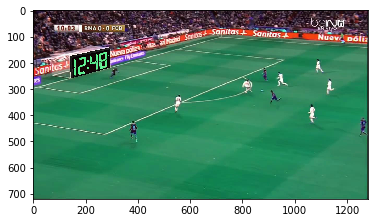

In [14]:
# Show projected logo image
#img = cv2.drawKeypoints(img,kp,None,color=(255,0,0) ) # , flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(imgP)
